# 基于EM算法的聚类

# 1 数据分布服从高斯分布的情况

In [436]:
# 读取matlab格式的数据
import scipy.io as sio  
import matplotlib.pyplot as plt
from pylab import *
import numpy as np  
%matplotlib inline

In [379]:
# path ="kmeansdata.mat"
# the path of .mat data
#data=sio.loadmat(path)['X']
#data[:2]
# np.save("emdata.npy", data)

In [440]:
data = np.load("emdata.npy")
data.shape

(100, 2)

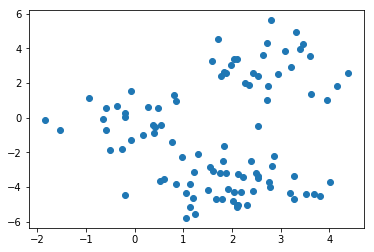

In [441]:
plt.scatter(data[:, 0], data[:, 1])

In [442]:
# 多元高斯分布
d1 = np.random.multivariate_normal(mean=[0,0], cov=[[1, 0], [0,1]], size = 100)

In [471]:
m = 2 # 特征数量
N = 100
pi = 3.14
k = 3
#q = np.zeros((N, k), dtype=np.float32)
q = np.random.uniform(size=(N, k), high=1, low=0)
q = q / np.sum(q, axis=1, keepdims=True) # 将概率矩阵归一化

ms = np.random.randn(k, m)


# 构造k 个协方差矩阵进行计算
covs = np.zeros((k, m, m))
# 确保协方差矩阵中的每个元素的值都是大于0的。方差不可能小于0 的
for i in range(k):
    covs[i] = np.random.random(1) * np.eye(2)
    

# 各个类别的先验概率：
priors = np.round(np.repeat(1/k, k), 2).reshape(k, 1)
maxiters = 10
iters = 0
covs[1]

array([[0.32383756, 0.        ],
       [0.        , 0.32383756]])

In [472]:
for i in range(3):
    print(covs[i])

[[0.29540041 0.        ]
 [0.         0.29540041]]
[[0.32383756 0.        ]
 [0.         0.32383756]]
[[0.17562726 0.        ]
 [0.         0.17562726]]


In [473]:
# tx = np.matmul(np.random.randn(N, k), priors.reshape(k, 1))
# np.sum(np.sum(np.multiply(q, np.log(q))))
# const = -(m / 2) * np.log(2 * pi) - 0.5 * log(np.linalg.det(np.cov(covs[1])))
# const
# np.sum(q,axis=1)

In [474]:
"""
i = 2
dets = np.linalg.det(covs[i])
invs = np.linalg.inv(covs[i])
const = -(m / 2) * np.log(2 * pi) - 0.5 * np.log(dets)
xm = data - ms[i]
temp = const - 0.5 * np.diag(np.matmul(np.matmul(xm, invs), xm.T))
temp.shape
"""

'\ni = 2\ndets = np.linalg.det(covs[i])\ninvs = np.linalg.inv(covs[i])\nconst = -(m / 2) * np.log(2 * pi) - 0.5 * np.log(dets)\nxm = data - ms[i]\ntemp = const - 0.5 * np.diag(np.matmul(np.matmul(xm, invs), xm.T))\ntemp.shape\n'

In [480]:
iters = 0
binf = np.repeat(0., 20)
# binf[0] = -np.Inf
while iters < 19:
    iters += 1
    # 计算高斯分布的数据：
    #：
    temp = np.zeros((N, 3))
    for i in range(3):
        dets = np.linalg.det(covs[i])
        invs = np.linalg.inv(covs[i]+ 0.001)
        
        const = -(m / 2) * np.log(2 * pi) - 0.5 * log(dets)
        xm = data - ms[i]
        temp[:,i] = const - 0.5 * np.diag(np.matmul(np.matmul(xm, invs), xm.T))
        
    
    # 计算似然:
    temp1 = np.sum(np.matmul(q, np.log(priors)))
    temp2 = np.sum(np.sum(np.multiply(q, temp)))
    temp3 = np.sum(np.sum(np.multiply(q, np.log(q))))
    binf[iters] = temp1 + temp2 - temp3
    if np.abs(binf[iters] - binf[iters-1]) < 0.001:
        break
    
    #temp = temp + priors.T
    #temp_q = np.exp(temp - np.max(temp, axis=1, keepdims=True))
    temp_q = np.multiply(np.exp(temp), priors.T)
    q = temp_q / np.sum(temp_q, axis=1, keepdims=True)
    
    priors = np.sum(q, axis=0).reshape(k, 1)
    #for i in range(k):
    ms = np.matmul(data.T, q).T / (np.sum(q, keepdims=True, axis=0).T + 0.001)
    
    for i in range(k):
        xm = data - ms[i]
        # covs[i] = np.matmul(xm, xm.T)
        covs[i] =  np.matmul(xm.T, np.multiply(xm, q[:,i:i+1]))
        covs[i] = covs[i] / (np.sum(q, axis=0)[i] + 0.001)

In [481]:
# np.sum(temp_q / np.sum(temp_q, axis=1, keepdims=True),axis=1)
# np.max(temp, axis=1, keepdims=True)

In [482]:
# np.argmax(q, axis=1)
binf

array([ 0.        , 81.07513245, 81.47602899, 81.93988878, 82.46680756,
       83.02415526, 83.51498167, 83.82881638, 83.96694559, 84.01343045,
       84.02763453, 84.03200755, 84.03341626, 84.03390241,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [483]:
tx = np.argmax(q, axis=1)

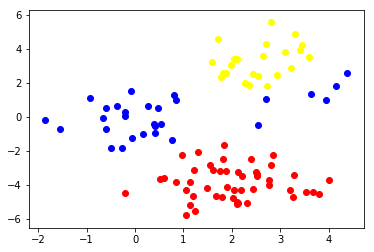

In [484]:
color=["red", "yellow", "blue"]
for i in range(N):
    plt.scatter(data[i,0], data[i, 1], color=color[tx[i]])